In [58]:
from ast import increment_lineno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
df = pd.read_csv('/content/diwali.csv', encoding='latin-1')
df.shape


(11251, 15)

In [14]:
display(df.head())

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [26]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [28]:
df.dropna(inplace=True)

In [30]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [31]:
df.shape

(11239, 13)

In [32]:
df['Amount']=df['Amount'].astype('int')

In [33]:
df["Amount"].dtypes

dtype('int64')

In [37]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


**EXPLORATORY DATA ANALYSIS
**

GENDER


In [38]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [39]:
df.Gender

,Gender
0,F
1,F
2,F
3,M
4,M
...,...
11246,M
11247,M
11248,F
11249,M


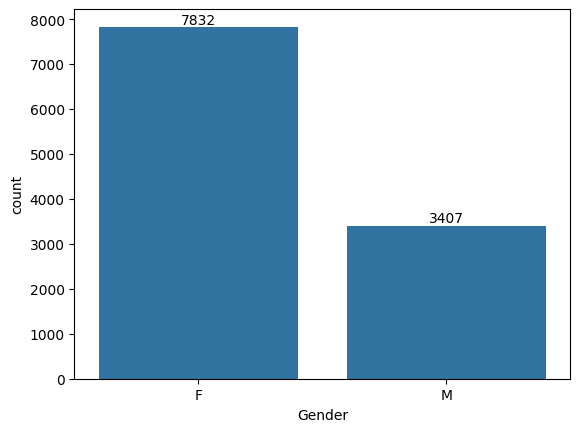

In [61]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [53]:
df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by="Amount", ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

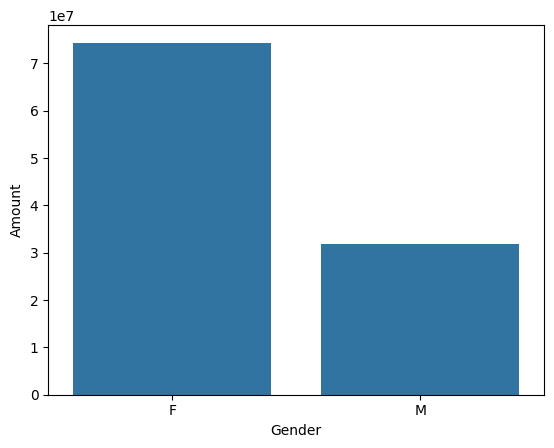

In [54]:
sales_gen=df.groupby(["Gender"], as_index = False)["Amount"].sum().sort_values(by="Amount", ascending=False)
sns.barplot(x="Gender", y="Amount", data=sales_gen)

**AGE**

In [55]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

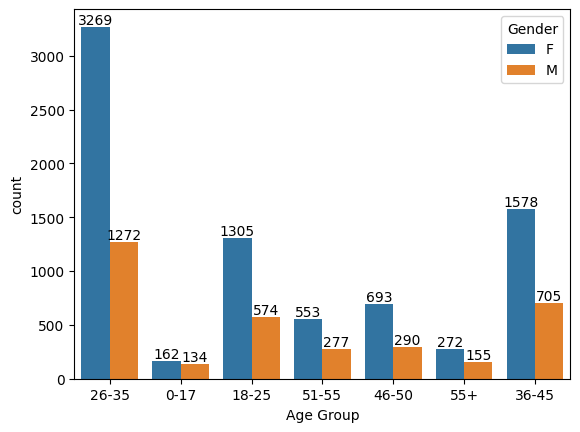

In [60]:
ax=sns.countplot(data=df, x = "Age Group", hue ="Gender")
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

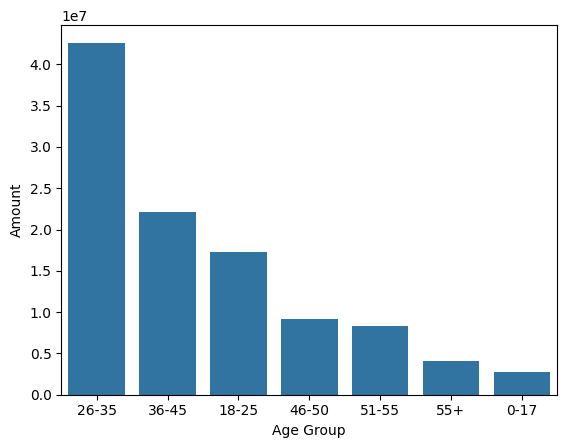

In [62]:
#total amount vs total age gender
sales_age=df.groupby(['Age Group'], as_index=False)["Amount"].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_age)


**STATE**

In [64]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

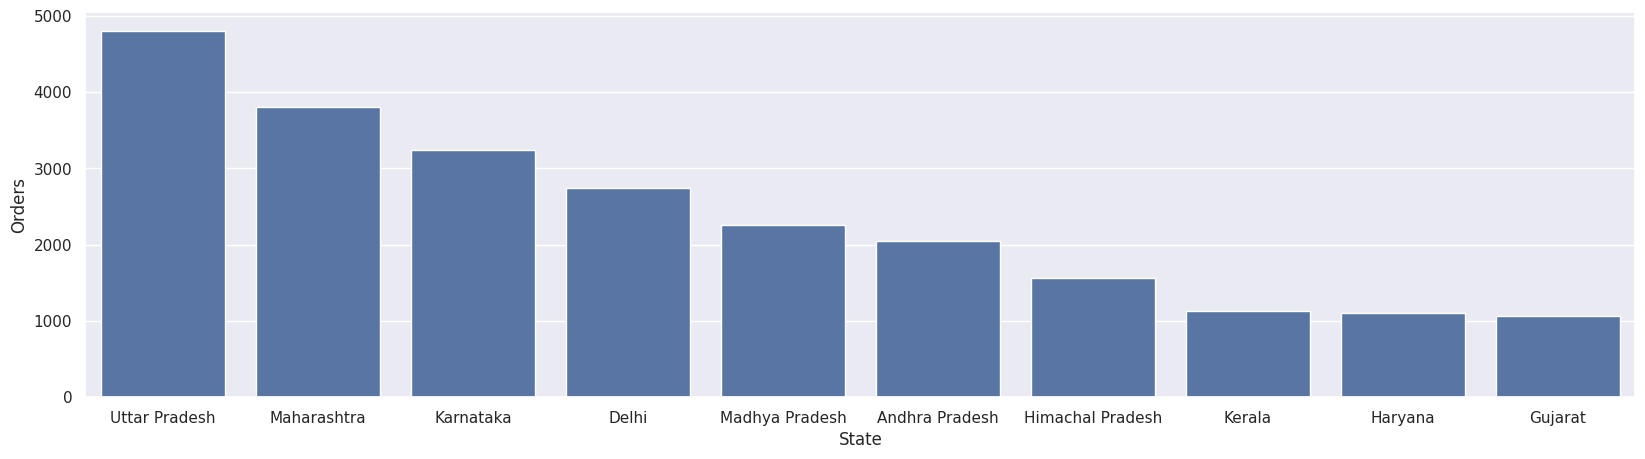

In [74]:
#total number of order from top 10 states
sales_state=df.groupby(['State'], as_index=False)["Orders"].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State', y='Orders', data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

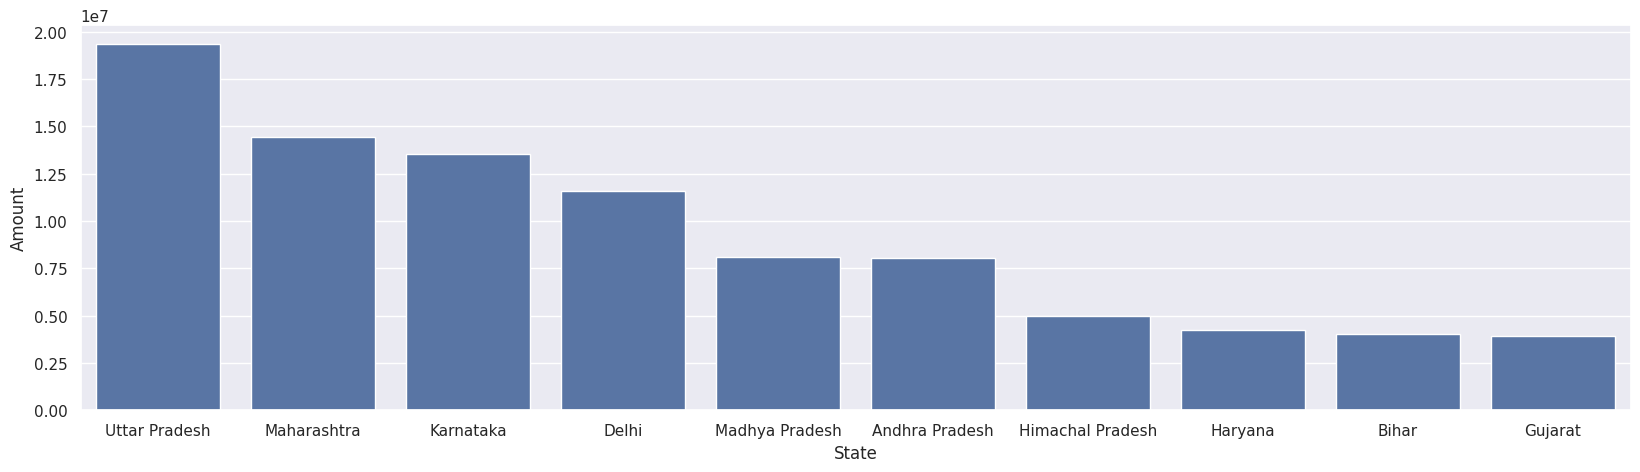

In [77]:
#total amount /sales from top 10 states
sales_state=df.groupby(['State'], as_index=False)["Amount"].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State', y='Amount', data=sales_state)

Product Category


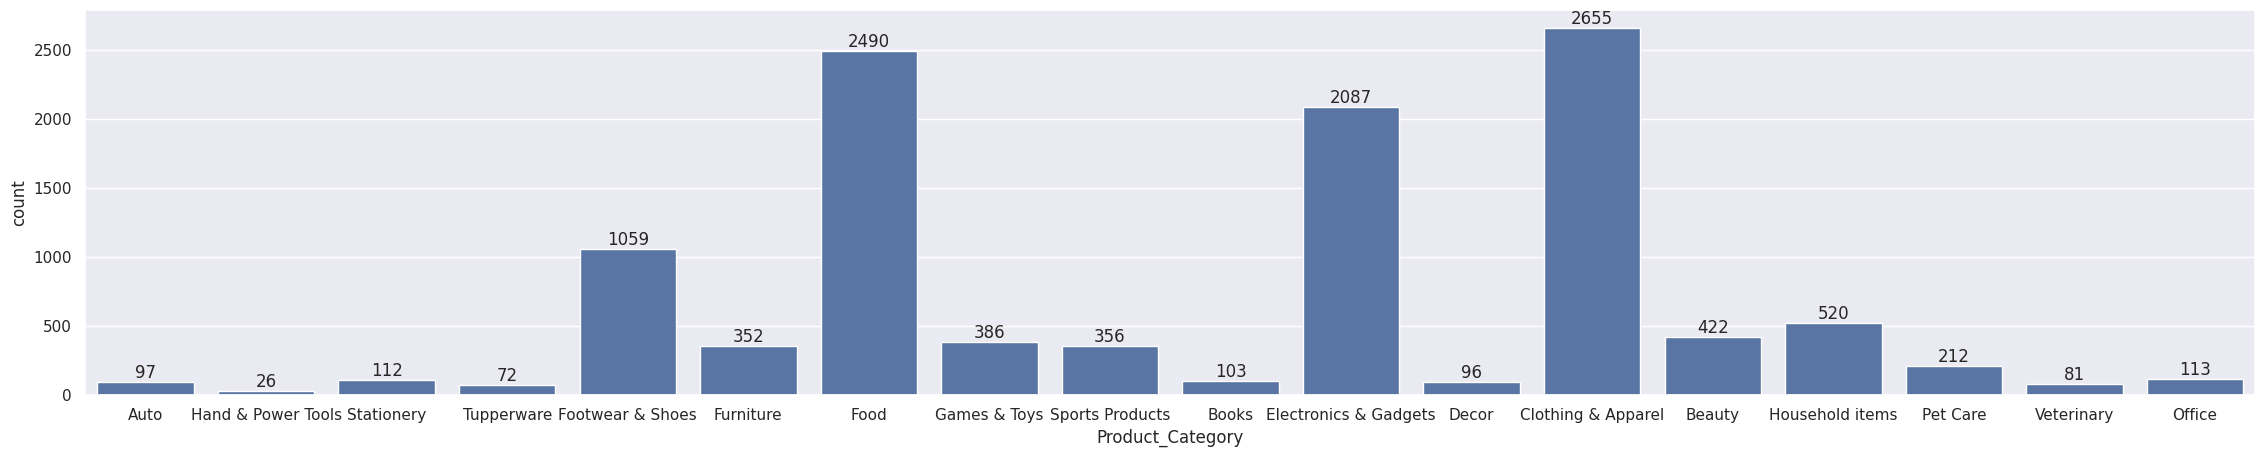

In [80]:
sns.set(rc={'figure.figsize':(28,5)})
ax=sns.countplot(data=df, x='Product_Category')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

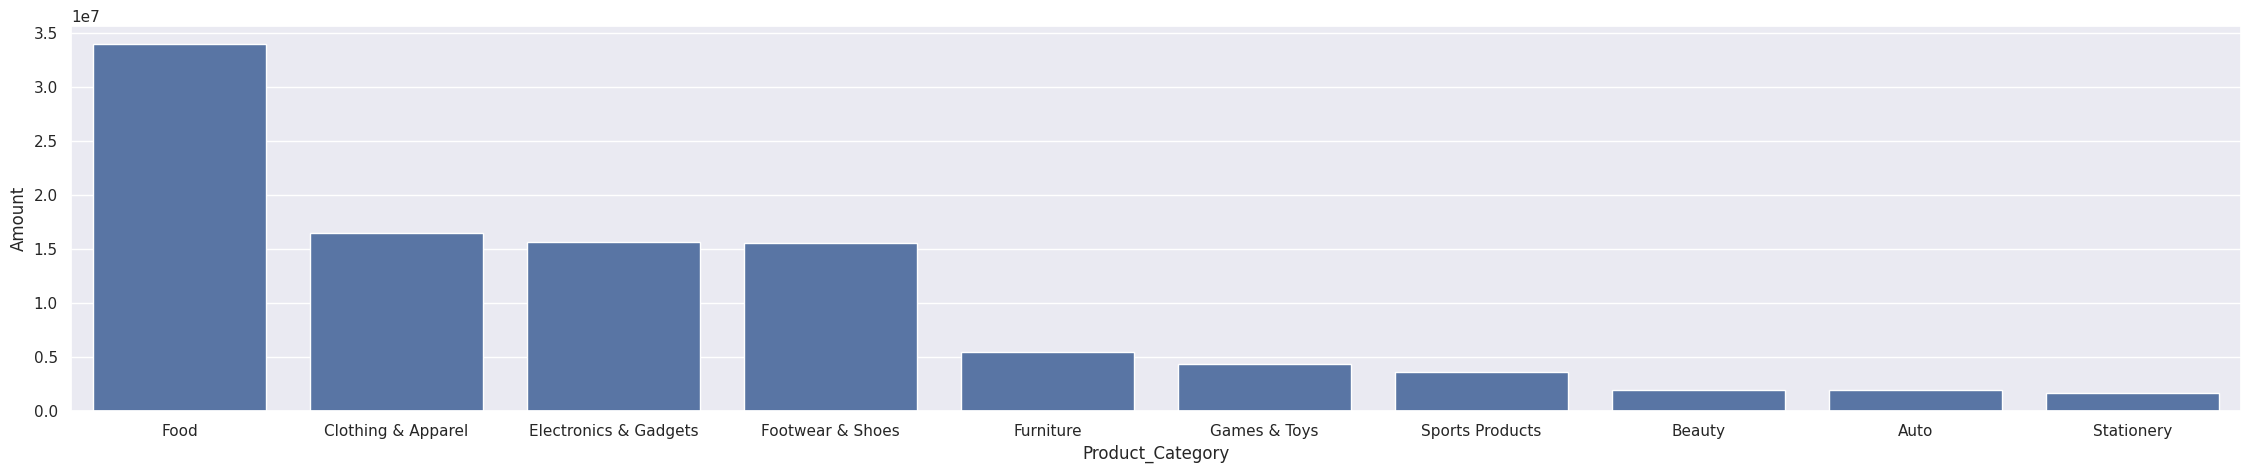

In [82]:
sales_state=df.groupby(['Product_Category'], as_index=False)["Amount"].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(x='Product_Category', y='Amount', data=sales_state)

# **CONCLUSION**

MARRIED WOMEN AGE GROUP 26-35 YRS FROM UP, MAHARASTRA AND KARNATAKA WORKING IT, HEALTHCARE ARE MORE LIKELY  TO BUY PRODUCTS  FROM FOOD,CLOTHING AND ELECTRONICS CATEGORY.